In [1]:
# Importing all the Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
!pip install -U imbalanced-learn

  Using cached https://files.pythonhosted.org/packages/e5/4c/7557e1c2e791bd43878f8c82065bddc5798252084f26ef44527c02262af1/imbalanced_learn-0.4.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c1/1c/8fa5aefe23a2fc254e9faadc10a30052c63d92f05fb59127ff0e65e4171c/scikit_learn-0.20.2-cp36-cp36m-win_amd64.whl
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.19.1-py3.6.egg-info\\dependency_links.txt'
Consider using the `--user` option or check the permissions.



In [3]:
# For loading .arff files
from scipy.io import arff
# To perform mean imputation
from sklearn.preprocessing import Imputer
#To perform kFold Cross Validation
from sklearn.model_selection import KFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 
# To analyze the type of missing data
import missingno as msno
# Library for performing k-NN and MICE imputations 
import fancyimpute

# To perform mean imputation
from sklearn.preprocessing import Imputer


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# Impoting classification models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
# Import metrics
import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [6]:
# Read the data
bank_data = pd.read_csv("bank_data.csv")

In [7]:
bank_data.shape

(24996, 65)

In [8]:
bank_data.head()
bank_data.info()
bank_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24996 entries, 0 to 24995
Data columns (total 65 columns):
Attr1     24990 non-null float64
Attr2     24990 non-null float64
Attr3     24990 non-null float64
Attr4     24910 non-null float64
Attr5     24951 non-null float64
Attr6     24990 non-null float64
Attr7     24990 non-null float64
Attr8     24931 non-null float64
Attr9     24988 non-null float64
Attr10    24990 non-null float64
Attr11    24086 non-null float64
Attr12    24910 non-null float64
Attr13    24913 non-null float64
Attr14    24990 non-null float64
Attr15    24968 non-null float64
Attr16    24931 non-null float64
Attr17    24931 non-null float64
Attr18    24990 non-null float64
Attr19    24912 non-null float64
Attr20    24913 non-null float64
Attr21    19595 non-null float64
Attr22    24990 non-null float64
Attr23    24913 non-null float64
Attr24    24495 non-null float64
Attr25    24990 non-null float64
Attr26    24931 non-null float64
Attr27    22269 non-null float64


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,24990.000000,24990.000000,24990.000000,24910.000000,2.495100e+04,24990.000000,24990.000000,24931.000000,24988.000000,24990.000000,...,2.499600e+04,2.491300e+04,24989.000000,2.494200e+04,24989.000000,2.322600e+04,24935.000000,2.491300e+04,24910.000000,24469.000000
mean,-0.025399,0.674995,0.048404,5.433537,-2.011619e+02,-0.121430,0.025566,8.587400,2.546445,0.617376,...,6.972576e+03,-4.530407e+01,-0.106698,4.901334e+01,2.479371,3.959328e+02,17.266378,1.613429e+03,8.776456,58.241379
std,4.834482,6.586872,6.573579,181.872588,2.929780e+04,8.790638,4.954985,297.912558,46.266459,16.707811,...,7.213189e+04,7.022098e+03,12.346187,7.028316e+03,213.995088,2.517297e+04,687.213040,1.661766e+05,56.788089,1296.960654
min,-463.890000,-2.421800,-479.960000,-0.403110,-2.722100e+06,-508.410000,-463.890000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1236.300000,-1.986900e+02,-284.380000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-3.726500
25%,0.000445,0.289430,0.000000,1.006500,-5.758000e+01,-0.002932,0.002026,0.364790,1.018775,0.257872,...,8.762750e-02,7.431300e-03,0.008628,8.751700e-01,0.000000,5.461375e+00,4.551100,4.401100e+01,2.944900,2.196730
50%,0.044284,0.504040,0.174070,1.495850,-6.096100e+00,0.000000,0.053477,0.967690,1.210900,0.474620,...,8.757900e+02,4.974600e-02,0.117340,9.517900e-01,0.013621,9.613650e+00,6.680700,7.620729e+01,4.844703,4.207215
75%,0.126060,0.726772,0.383167,2.688350,4.581100e+01,0.062831,0.146965,2.460100,2.043200,0.688520,...,4.583973e+03,1.273900e-01,0.285450,9.931300e-01,0.293780,2.020900e+01,10.371000,1.259001e+02,8.417800,9.629100
max,94.280000,480.960000,22.769000,27146.000000,1.250100e+06,303.670000,186.430000,29636.000000,3876.100000,1027.200000,...,4.398400e+06,2.931500e+02,147.190000,1.108300e+06,23853.000000,3.660200e+06,108000.000000,2.501600e+07,7641.300000,127680.000000


In [9]:
# Convert the Target Variables to Numeric
bank_data["target"] = bank_data["target"].replace({'No':0, 'Yes':1})

In [10]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24996 entries, 0 to 24995
Data columns (total 65 columns):
Attr1     24990 non-null float64
Attr2     24990 non-null float64
Attr3     24990 non-null float64
Attr4     24910 non-null float64
Attr5     24951 non-null float64
Attr6     24990 non-null float64
Attr7     24990 non-null float64
Attr8     24931 non-null float64
Attr9     24988 non-null float64
Attr10    24990 non-null float64
Attr11    24086 non-null float64
Attr12    24910 non-null float64
Attr13    24913 non-null float64
Attr14    24990 non-null float64
Attr15    24968 non-null float64
Attr16    24931 non-null float64
Attr17    24931 non-null float64
Attr18    24990 non-null float64
Attr19    24912 non-null float64
Attr20    24913 non-null float64
Attr21    19595 non-null float64
Attr22    24990 non-null float64
Attr23    24913 non-null float64
Attr24    24495 non-null float64
Attr25    24990 non-null float64
Attr26    24931 non-null float64
Attr27    22269 non-null float64


In [11]:
# Removing duplicate rows
bank_data = bank_data.drop_duplicates()

In [12]:
bank_data.shape

(20486, 65)

In [13]:
# Find the Target value distribution
bank_data["target"].value_counts()

0    16322
1     4164
Name: target, dtype: int64

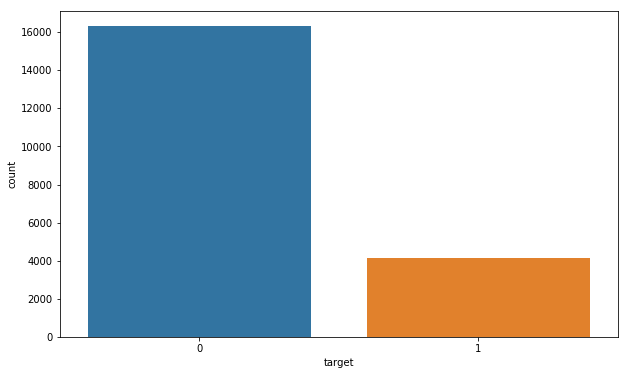

In [14]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='target',data = bank_data)

In [15]:
# Missing Data
bank_data.isnull().mean()

Attr1     0.000244
Attr2     0.000244
Attr3     0.000244
Attr4     0.003222
Attr5     0.001708
Attr6     0.000244
Attr7     0.000244
Attr8     0.002441
Attr9     0.000293
Attr10    0.000244
Attr11    0.044323
Attr12    0.003222
Attr13    0.003271
Attr14    0.000244
Attr15    0.000879
Attr16    0.002441
Attr17    0.002441
Attr18    0.000244
Attr19    0.003319
Attr20    0.003271
Attr21    0.234453
Attr22    0.000244
Attr23    0.003271
Attr24    0.018696
Attr25    0.000244
Attr26    0.002441
Attr27    0.122962
Attr28    0.022064
Attr29    0.000244
Attr30    0.003271
            ...   
Attr36    0.000244
Attr37    0.464366
Attr38    0.000244
Attr39    0.003271
Attr40    0.003222
Attr41    0.014156
Attr42    0.003271
Attr43    0.003271
Attr44    0.003271
Attr45    0.075369
Attr46    0.003319
Attr47    0.006492
Attr48    0.000244
Attr49    0.003271
Attr50    0.002441
Attr51    0.000244
Attr52    0.006687
Attr53    0.022064
Attr54    0.022064
Attr55    0.000000
Attr56    0.003271
Attr57    0.

In [16]:
data_preprocessing = bank_data.copy()
data_preprocessing.drop(['target'], axis = 1, inplace = True)

In [17]:
normalized_data = (data_preprocessing - data_preprocessing.mean())/data_preprocessing.std()
normalized_data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.010523,-0.056417,0.028888,-0.019013,0.009241,0.055009,0.004753,-0.022263,-0.036006,0.010812,...,0.026522,0.007135,0.016189,-0.007554,-0.009990,-0.014836,-0.021041,-0.009855,-0.096895,-0.042566
1,0.009696,-0.061144,0.053769,-0.015948,0.006999,0.019265,0.003892,-0.020198,-0.002400,0.018163,...,-0.088364,0.007128,0.015230,-0.007549,-0.010492,-0.014829,-0.010199,-0.010310,-0.010793,-0.038787
2,0.006807,-0.019819,-0.031520,-0.025953,0.004888,0.019281,-0.000566,-0.026458,-0.003631,-0.003231,...,-0.157249,0.007130,0.015172,-0.007548,-0.009831,-0.014403,-0.003517,-0.010108,-0.070866,-0.041420
3,-0.034806,-0.057371,0.024849,-0.020137,0.021476,0.019281,-0.041263,-0.021308,0.025217,0.016209,...,-0.093820,0.007151,-0.005951,-0.007569,-0.010492,-0.013906,0.043653,-0.010372,0.033839,-0.039284
4,0.091254,-0.076722,0.105592,0.002544,0.018060,0.019281,0.108210,-0.011303,-0.019016,0.026227,...,-0.085097,0.007170,0.047472,-0.007589,-0.010492,NaN,-0.017254,-0.010369,0.031383,-0.027191


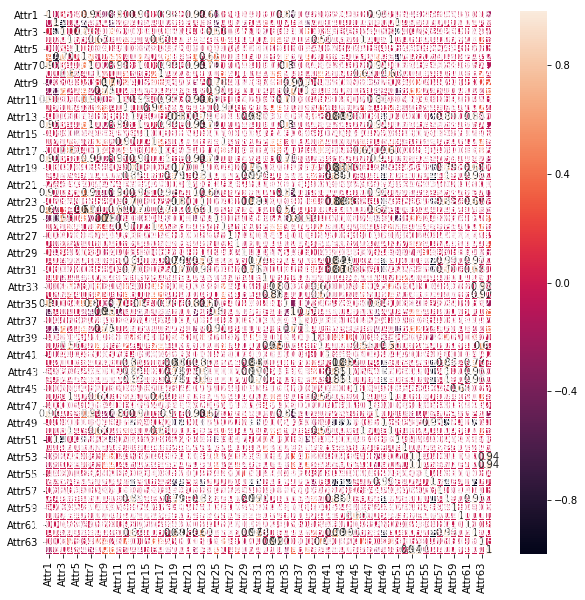

In [18]:
# Check for Correlation among all variables  
corr = normalized_data[normalized_data.columns].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,annot = True, linewidths=0.5, ax=ax)

In [19]:
# Check for Skewness in the dataset 
normalized_data.skew()

Attr1     -80.686995
Attr2      60.371459
Attr3     -60.688301
Attr4     124.061901
Attr5     -56.762620
Attr6     -38.235423
Attr7     -67.040587
Attr8      75.619517
Attr9      97.739562
Attr10     37.268228
Attr11    -73.334068
Attr12    -48.540494
Attr13    107.656012
Attr14    -67.040593
Attr15     79.701520
Attr16    -36.245888
Attr17     73.819926
Attr18    -64.731368
Attr19     72.412761
Attr20    142.852626
Attr21    111.747178
Attr22    -76.344072
Attr23     73.904725
Attr24    -10.340542
Attr25     46.980394
Attr26    -50.448470
Attr27     48.586952
Attr28     55.255899
Attr29     -0.162946
Attr30    140.195869
             ...    
Attr35    -87.317286
Attr36     92.527117
Attr37    101.529294
Attr38     37.265339
Attr39    -91.950301
Attr40     76.918219
Attr41     94.207178
Attr42     83.897927
Attr43    142.597981
Attr44    142.392482
Attr45     56.515611
Attr46    124.338939
Attr47     59.742438
Attr48    -82.813966
Attr49   -137.810273
Attr50    124.519671
Attr51     60

In [20]:
train = bank_data.copy()

In [21]:
train_labels = train['target']

In [22]:
train = train.drop(columns = ['target'])

In [23]:
train.head()


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.036348,0.29370,0.22999,1.95800,49.611,0.323820,0.044336,2.17300,1.0571,0.63820,...,8667.800,0.054040,0.056955,0.94596,0.084022,4.5846,2.1621,128.140,2.8484,1.2904
1,0.032515,0.25971,0.40845,2.57270,-6.682,-0.000148,0.040253,2.85050,2.1327,0.74029,...,442.920,0.000329,0.043921,0.98201,0.000000,4.7734,10.3800,44.448,8.2118,6.4267
2,0.019116,0.55685,-0.20328,0.56593,-59.719,0.000000,0.019116,0.79581,2.0933,0.44315,...,-4488.700,0.016719,0.043137,0.99131,0.110710,16.4970,15.4440,81.660,4.4698,2.8481
3,-0.173850,0.28684,0.20102,1.73250,356.930,0.000000,-0.173850,2.48630,3.0166,0.71316,...,52.284,0.178720,-0.243780,0.82306,0.000000,30.1680,51.1950,33.206,10.9920,5.7509
4,0.410710,0.14770,0.78015,6.28190,271.120,0.000000,0.534880,5.77040,1.6009,0.85230,...,676.810,0.326340,0.481890,0.66935,0.000000,NaN,5.0324,33.676,10.8390,22.1870


In [24]:
from feature_selector import FeatureSelector

In [25]:
#Implementation
#The FeatureSelector has five functions for identifying columns to remove:

#identify_missing
#identify_single_unique
#identify_collinear
#identify_zero_importance
#identify_low_importance

fs = FeatureSelector(data = train, labels = train_labels)

In [26]:
#Missing Values
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



In [27]:
missing_features = fs.ops['missing']
missing_features[:10]

[]

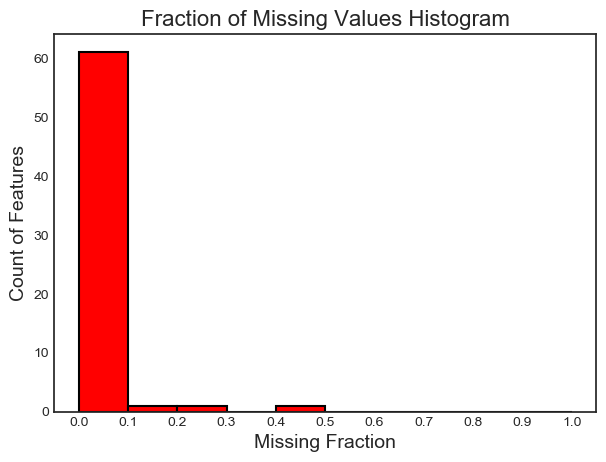

In [28]:
fs.plot_missing()

In [29]:
fs.missing_stats.head(12)

,missing_fraction
Attr37,0.464366
Attr21,0.234453
Attr27,0.122962
Attr45,0.075369
Attr60,0.075369
Attr11,0.044323
Attr53,0.022064
Attr64,0.022064
Attr54,0.022064
Attr28,0.022064


In [30]:
#Finding Single Unique value
fs.identify_single_unique()

0 features with a single unique value.



In [31]:
#Collinear (highly correlated) Features
fs.identify_collinear(correlation_threshold=0.99)

17 features with a correlation magnitude greater than 0.99.



In [32]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['Attr3', 'Attr14', 'Attr17', 'Attr23', 'Attr26']

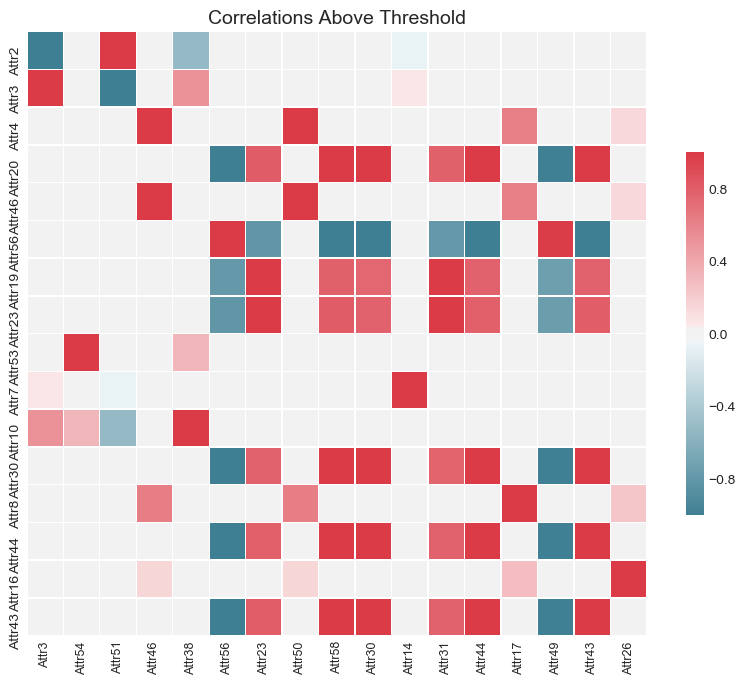

In [33]:
fs.plot_collinear()

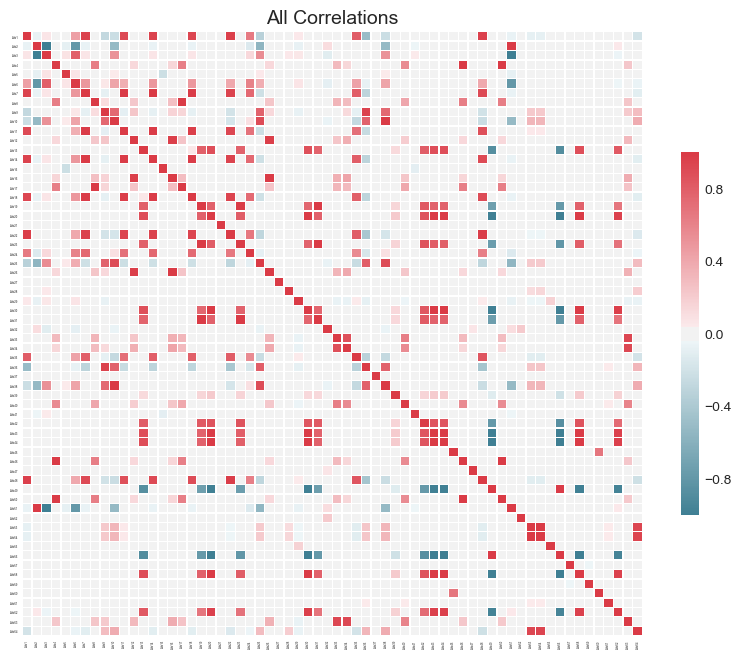

In [34]:
fs.plot_collinear(plot_all=True)

20 features with a correlation magnitude greater than 0.98.



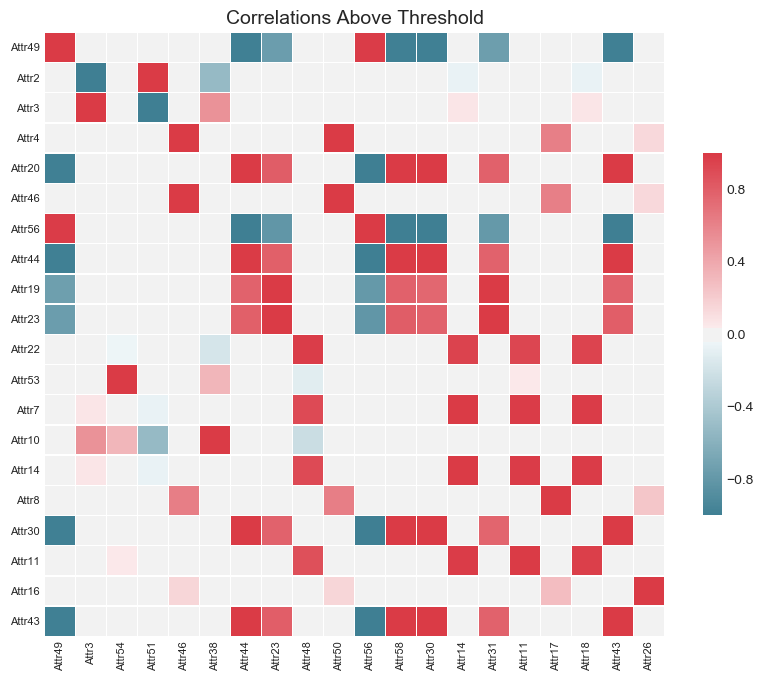

In [35]:
fs.identify_collinear(correlation_threshold=0.98)
fs.plot_collinear()

In [36]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,Attr3,Attr2,-0.996360
1,Attr11,Attr7,0.987910
2,Attr14,Attr7,1.000000
3,Attr14,Attr11,0.987910
4,Attr17,Attr8,0.998026
5,Attr18,Attr7,0.989604
6,Attr18,Attr14,0.989645
7,Attr23,Attr19,0.997336
8,Attr26,Attr16,0.995857
9,Attr30,Attr20,0.993833


In [37]:
#Identifying the Zero Importance Feature
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[456]	valid_0's binary_logloss: 0.119852	valid_0's auc: 0.983484
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[578]	valid_0's binary_logloss: 0.0885172	valid_0's auc: 0.99195
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[348]	valid_0's binary_logloss: 0.117853	valid_0's auc: 0.983919
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[530]	valid_0's binary_logloss: 0.102855	valid_0's auc: 0.988768
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[465]	valid_0's binary_logloss: 0.102572	valid_0's auc: 0.988389
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[504]	valid_0's binary_logloss: 0.107854	valid_0's au

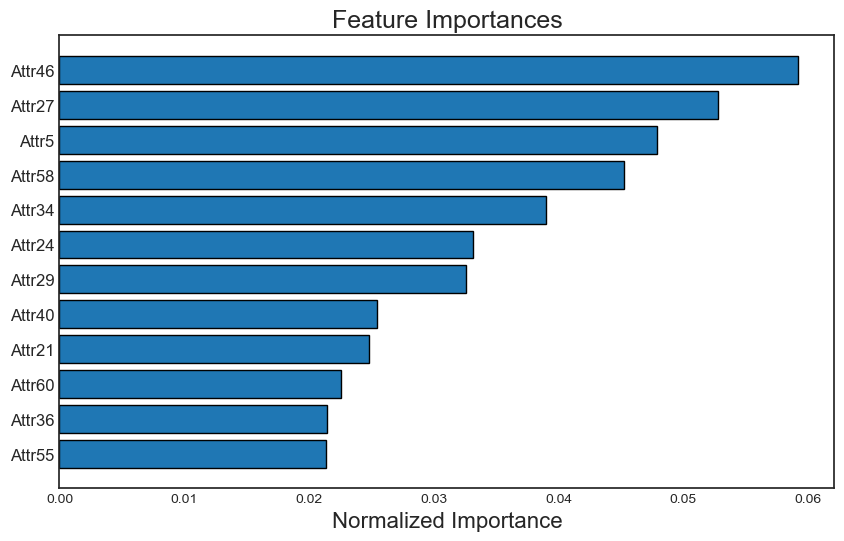

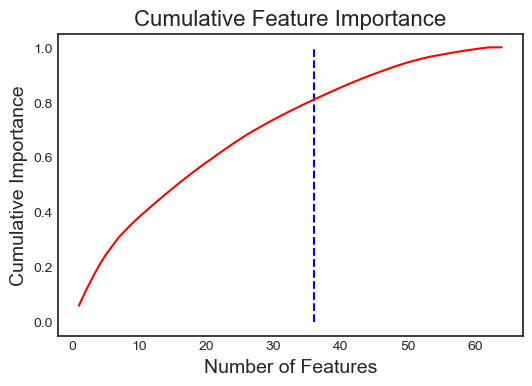

36 features required for 0.80 of cumulative importance


In [38]:
fs.plot_feature_importances(threshold = 0.80, plot_n = 12)

In [39]:
fs.feature_importances.head(15)

,feature,importance,normalized_importance,cumulative_importance
0,Attr46,823.1,0.059169,0.059169
1,Attr27,734.2,0.052778,0.111947
2,Attr5,666.7,0.047926,0.159873
3,Attr58,629.9,0.045281,0.205154
4,Attr34,543.1,0.039041,0.244195
5,Attr24,461.0,0.033139,0.277334
6,Attr29,452.8,0.032550,0.309884
7,Attr40,354.4,0.025476,0.335361
8,Attr21,344.9,0.024793,0.360154
9,Attr60,313.8,0.022558,0.382712


In [40]:
fs.identify_low_importance(cumulative_importance = 0.99)

59 features required for cumulative importance of 0.99 after one hot encoding.
5 features do not contribute to cumulative importance of 0.99.



In [41]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['Attr10', 'Attr63', 'Attr2', 'Attr14', 'Attr18']

In [42]:
train_no_missing = fs.remove(methods = ['missing'])

Removed 0 features.


In [43]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 0 features.


In [44]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 23 features including one-hot features.


In [45]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 64
Final Number of Features:  41


In [46]:
fs = FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.99, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

17 features with a correlation magnitude greater than 0.99.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[566]	valid_0's binary_logloss: 0.0991662	valid_0's auc: 0.988203
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[645]	valid_0's binary_logloss: 0.0976021	valid_0's auc: 0.990655
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[352]	valid_0's binary_logloss: 0.110387	valid_0's auc: 0.987135
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[350]	valid_0's binary_logloss: 0.112351	valid_0's auc: 0.986
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[423]	valid_0's binary_logloss: 0.105395	valid_0's auc: 0.987087


In [47]:
train.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64'],
      dtype='object')

In [48]:
train_removed_all.columns

Index(['Attr1', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr12',
       'Attr13', 'Attr15', 'Attr16', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr24', 'Attr25', 'Attr27', 'Attr28', 'Attr29', 'Attr32', 'Attr33',
       'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr39', 'Attr40', 'Attr41',
       'Attr42', 'Attr45', 'Attr47', 'Attr52', 'Attr53', 'Attr55', 'Attr57',
       'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr64'],
      dtype='object')

In [49]:
bank_data = train_removed_all

In [50]:
type(bank_data)

pandas.core.frame.DataFrame

In [51]:
train_labels.value_counts()

0    16322
1     4164
Name: target, dtype: int64

In [52]:
bank_data.shape

(20486, 41)

In [53]:
# The above step shows us that there are a lot of rows which have missing data in at least one of the feature
# missing-data-rows correspond to more than 50% of the entire data.
#  Let us build sparsity Matrix
# To analyze the type of missing data
#import missingno as msno
# Library for performing k-NN and MICE imputations 

#import fancyimpute

In [54]:
bank_data.columns

Index(['Attr1', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr12',
       'Attr13', 'Attr15', 'Attr16', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr24', 'Attr25', 'Attr27', 'Attr28', 'Attr29', 'Attr32', 'Attr33',
       'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr39', 'Attr40', 'Attr41',
       'Attr42', 'Attr45', 'Attr47', 'Attr52', 'Attr53', 'Attr55', 'Attr57',
       'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr64'],
      dtype='object')

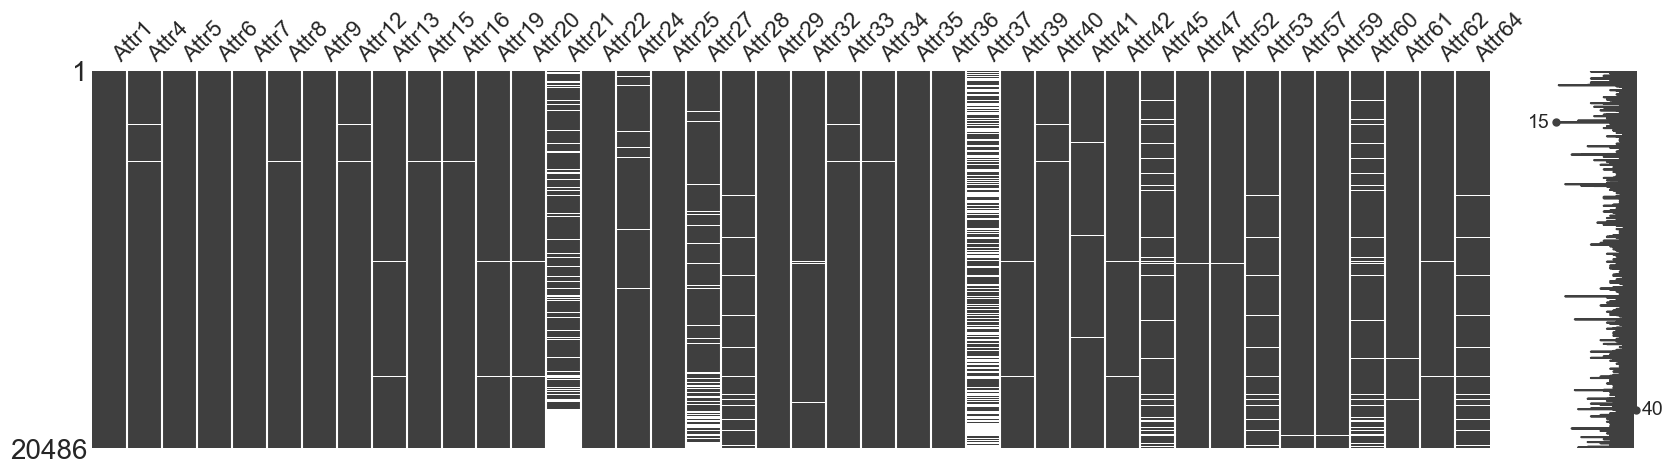

In [55]:
missing_data = bank_data.columns[bank_data.isnull().any()].tolist()
msno.matrix(bank_data[missing_data], figsize=(20,5))

In [56]:
#Generate heat map of missing values

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

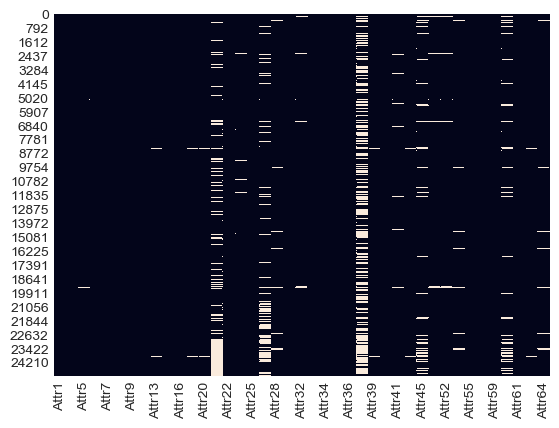

In [57]:
sns.heatmap(bank_data.isnull(), cbar=False)

In [58]:
#  we could notice a lot of sparsity for the featureAttr37 has the highest sparsity among all the features for all the dataframes. The feature Attr21 is sparse for some,

<BarContainer object of 41 artists>

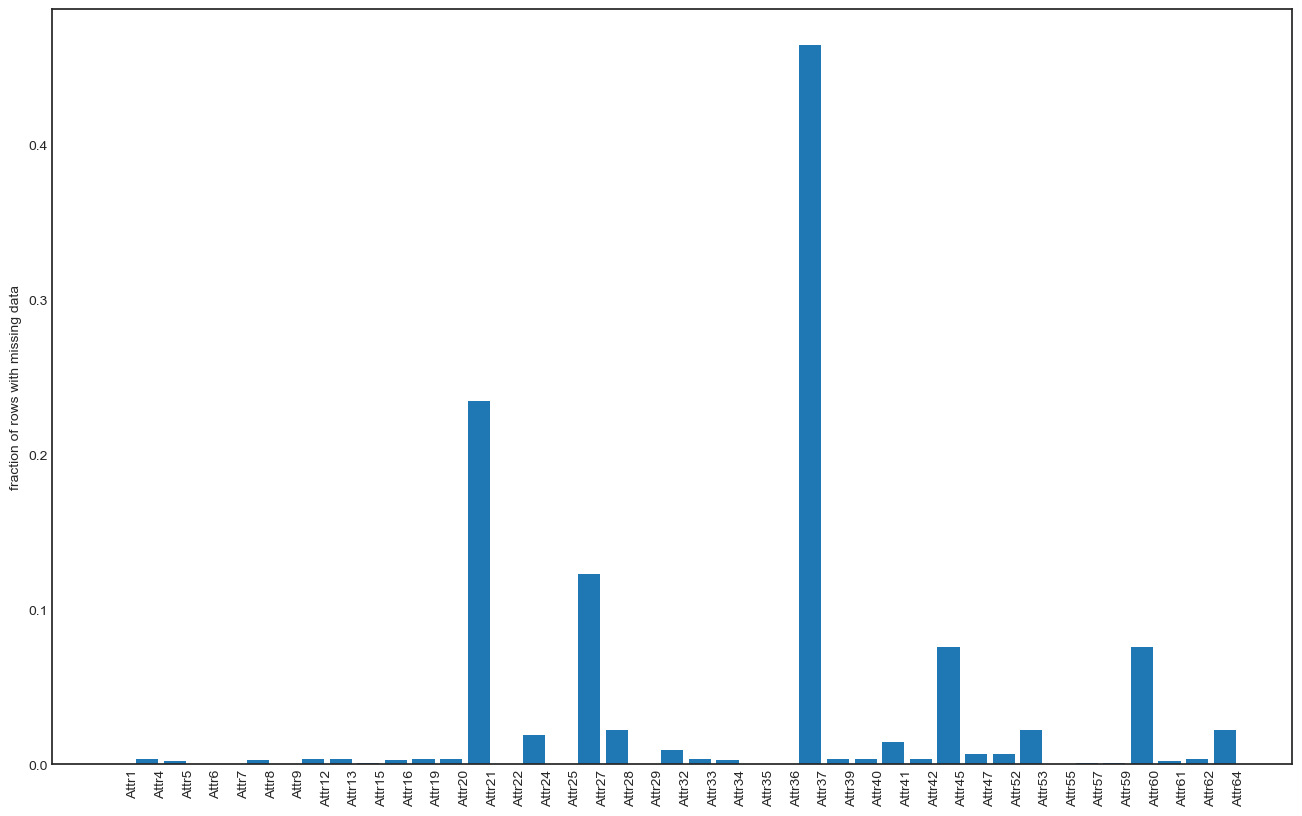

In [59]:
null_counts = bank_data.isnull().sum()/len(bank_data)
plt.figure(figsize=(16,10))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [60]:
# WE noticed that Attr37, Attr21, Attr60 and Attr27m attr45 had majority of missing values

In [61]:
# Data Imputation
# Impute missing values with mean Imputation
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(strategy="mean")
bank_data_mean_imputed = bank_data.copy()
bank_data_mean_imputed.iloc[:,0:42] = mean_imputer.fit_transform(bank_data_mean_imputed.iloc[:,0:42])

In [62]:
bank_data_mean_imputed.isnull().sum()

Attr1     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr12    0
Attr13    0
Attr15    0
Attr16    0
Attr19    0
Attr20    0
Attr21    0
Attr22    0
Attr24    0
Attr25    0
Attr27    0
Attr28    0
Attr29    0
Attr32    0
Attr33    0
Attr34    0
Attr35    0
Attr36    0
Attr37    0
Attr39    0
Attr40    0
Attr41    0
Attr42    0
Attr45    0
Attr47    0
Attr52    0
Attr53    0
Attr55    0
Attr57    0
Attr59    0
Attr60    0
Attr61    0
Attr62    0
Attr64    0
dtype: int64

In [63]:
bank_data_mean_imputed.head()

,Attr1,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr12,Attr13,Attr15,...,Attr47,Attr52,Attr53,Attr55,Attr57,Attr59,Attr60,Attr61,Attr62,Attr64
0,0.036348,1.95800,49.611,0.323820,0.044336,2.17300,1.0571,0.184670,0.186780,839.310,...,84.162,0.37113,1.20430,8667.800,0.056955,0.084022,4.58460,2.1621,128.140,1.2904
1,0.032515,2.57270,-6.682,-0.000148,0.040253,2.85050,2.1327,0.154990,0.050150,886.300,...,76.491,0.12182,2.23090,442.920,0.043921,0.000000,4.77340,10.3800,44.448,6.4267
2,0.019116,0.56593,-59.719,0.000000,0.019116,0.79581,2.0933,0.040819,0.035765,2714.900,...,22.502,0.22753,0.60295,-4488.700,0.043137,0.110710,16.49700,15.4440,81.660,2.8481
3,-0.173850,1.73250,356.930,0.000000,-0.173850,2.48630,3.0166,-0.633490,-0.057632,-602.200,...,14.706,0.11058,1.35960,52.284,-0.243780,0.000000,30.16800,51.1950,33.206,5.7509
4,0.410710,6.28190,271.120,0.000000,0.534880,5.77040,1.6009,3.621400,0.360700,93.363,...,0.000,0.13696,11.81200,676.810,0.481890,0.000000,412.62703,5.0324,33.676,22.1870


In [64]:
train_labels.shape
bank_data_mean_imputed.shape

(20486, 41)

In [65]:
# Split the Train and Test Data
from sklearn.model_selection import train_test_split
# Split the data into X and y
X = bank_data_mean_imputed
y = train_labels

In [66]:
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [67]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16388, 41)
(4098, 41)
(16388,)
(4098,)


In [68]:
## Scale the numeric attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,0:64])

X_train.iloc[:,0:42] = scaler.transform(X_train.iloc[:,0:42])
X_test.iloc[:,0:42] = scaler.transform(X_test.iloc[:,0:42])

C:\Users\Prashanth Yerabati\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [69]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

          Attr1     Attr4     Attr5     Attr6     Attr7     Attr8     Attr9  \
22342 -0.014354 -0.022776  0.008292  0.015295 -0.021563 -0.026577  0.040083   
23695  0.049113 -0.018853  0.008488  0.022258  0.052739 -0.021008 -0.030996   
9596   0.031223 -0.018889  0.008860  0.058430  0.030507 -0.024406 -0.031849   
10278  0.008345 -0.005329  0.043318  0.015295  0.002186 -0.004623 -0.060612   
5227   0.067779 -0.010361  0.024791  0.015295  0.126960 -0.018693  0.091399   

         Attr12    Attr13    Attr15    ...       Attr47    Attr52    Attr53  \
22342 -0.012965 -0.013002 -0.869533    ...    -0.055583 -0.053341 -0.021849   
23695  0.029791 -0.011308 -0.020646    ...    -0.040637 -0.042498 -0.022369   
9596   0.000306 -0.011693 -0.033427    ...    -0.038752 -0.049010 -0.021941   
10278 -0.000777 -0.007583 -0.036639    ...    -0.061227 -0.026792 -0.021782   
5227   0.036601 -0.012034 -0.044308    ...    -0.061227 -0.063647 -0.010883   

         Attr55    Attr57    Attr59    Attr60    A

In [70]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [71]:
#Building Models
#Buliding Logistic Regression Model

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_train=lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr= lr.predict(X_test)
y_prob_test_lr= lr.predict_proba(X_test)[:,1]
acc_train_lr =accuracy_score(y_true=y_train,y_pred=y_pred_train_lr)
acc_test_lr = accuracy_score(y_true=y_test,y_pred=y_pred_test_lr)                          
print("Train Logistic Accuracy :",accuracy_score(y_true=y_train,y_pred=y_pred_train_lr))
print("Test Logistic Accuracy :",accuracy_score(y_true=y_test,y_pred=y_pred_test_lr))


Train Logistic Accuracy : 0.7960702953380522
Test Logistic Accuracy : 0.8006344558321132


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [72]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_lr = confusion_matrix(y_test, y_pred_test_lr)
cr_lr = classification_report(y_test,y_pred_test_lr)
print("\n Confusion matrix \n", confusion_matrix_test_lr)
print("\n Classification report \n", classification_report(y_test,y_pred_test_lr))





 Confusion matrix 
 [[3261   26]
 [ 791   20]]

 Classification report 
              precision    recall  f1-score   support

          0       0.80      0.99      0.89      3287
          1       0.43      0.02      0.05       811

avg / total       0.73      0.80      0.72      4098



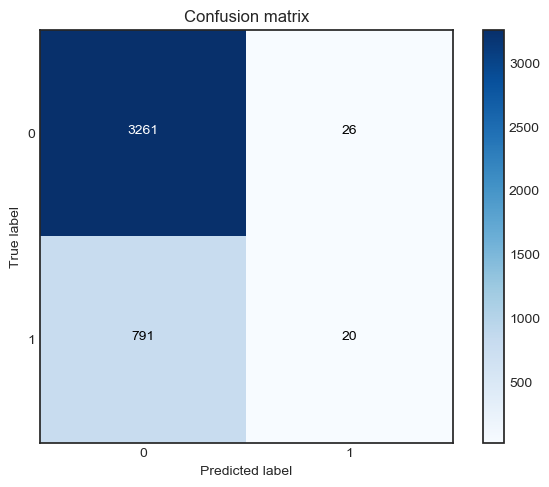

In [73]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_lr , classes=class_names, title='Confusion matrix')
plt.show()

In [74]:
Accuracy_Test_lr=(confusion_matrix_test_lr[0,0]+confusion_matrix_test_lr[1,1])/(confusion_matrix_test_lr[0,0]+confusion_matrix_test_lr[0,1]+confusion_matrix_test_lr[1,0]+confusion_matrix_test_lr[1,1])
TNR_Test_lr= confusion_matrix_test_lr[0,0]/(confusion_matrix_test_lr[0,0] +confusion_matrix_test_lr[0,1])
TPR_Test_lr= confusion_matrix_test_lr[1,1]/(confusion_matrix_test_lr[1,0] +confusion_matrix_test_lr[1,1])

print("Test TNR: ",TNR_Test_lr)
print("Test TPR: ",TPR_Test_lr)
print("Test Accuracy: ",Accuracy_Test_lr)

Test TNR:  0.9920900517188926
Test TPR:  0.02466091245376079
Test Accuracy:  0.8006344558321132


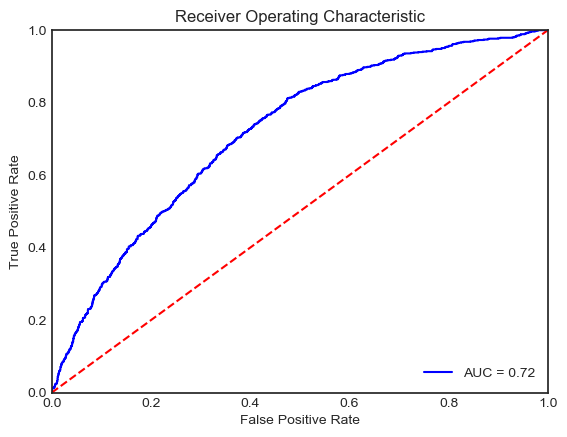

In [75]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_lr)
roc_auc_lr = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [76]:
print("Train Accuracy: ", acc_train_lr)
print("Test Accuracy: ", acc_test_lr)
print("Train Auc: ", roc_auc_lr)
print("Test TNR: ",TNR_Test_lr)
print("Test TPR: ",TPR_Test_lr)

Train Accuracy:  0.7960702953380522
Test Accuracy:  0.8006344558321132
Train Auc:  0.7182635176424559
Test TNR:  0.9920900517188926
Test TPR:  0.02466091245376079


In [77]:
# Model 2 SVM
from sklearn.svm import SVC
SVC = SVC(probability=True)
model_train_svc=SVC.fit(X_train, y_train)
y_pred_train_svc = SVC.predict(X_train)
y_pred_test_svc = SVC.predict(X_test)


In [78]:
y_prob_test_svc = SVC.predict_proba(X_test)[:,1]
acc_train_svc = accuracy_score(y_true=y_train,y_pred=y_pred_train_svc)
acc_test_svc = accuracy_score(y_true=y_test,y_pred=y_pred_test_svc)
print("Train SVC Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_svc))
print("Test SVC Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_svc))

Train SVC Accuracy: 0.7975958018061997
Test SVC Accuracy: 0.8011224987798926


In [79]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_svc = confusion_matrix(y_test, y_pred_test_svc)
print("\n Confusion matrix \n", confusion_matrix_test_svc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_svc))



 Confusion matrix 
 [[3282    5]
 [ 810    1]]

 Classification report 
              precision    recall  f1-score   support

          0       0.80      1.00      0.89      3287
          1       0.17      0.00      0.00       811

avg / total       0.68      0.80      0.71      4098



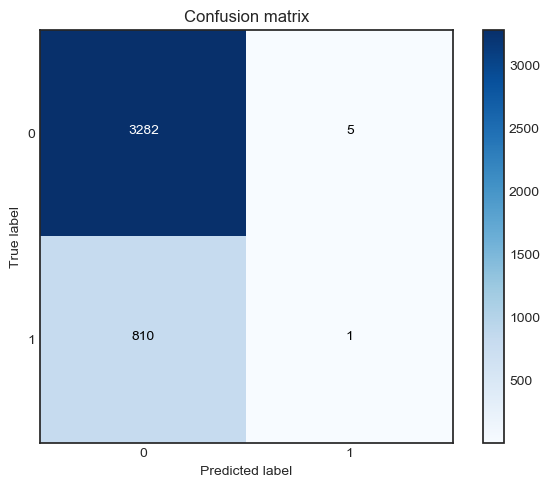

In [80]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_svc , classes=class_names, title='Confusion matrix')
plt.show()

In [81]:
Accuracy_Test=(confusion_matrix_test_svc[0,0]+confusion_matrix_test_svc[1,1])/(confusion_matrix_test_svc[0,0]+confusion_matrix_test_svc[0,1]+confusion_matrix_test_svc[1,0]+confusion_matrix_test_svc[1,1])
TNR_Test_svc= confusion_matrix_test_svc[0,0]/(confusion_matrix_test_svc[0,0] +confusion_matrix_test_svc[0,1])
TPR_Test_svc= confusion_matrix_test_svc[1,1]/(confusion_matrix_test_svc[1,0] +confusion_matrix_test_svc[1,1])

print("Test TNR: ",TNR_Test_svc)
print("Test TPR: ",TPR_Test_svc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.998478856099787
Test TPR:  0.0012330456226880395
Test Accuracy:  0.8011224987798926


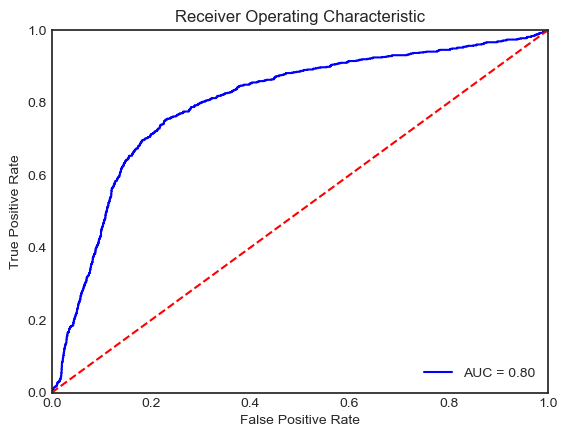

In [82]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_svc)
roc_auc_svc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
print("Train Accuracy: ", acc_train_svc)
print("Test Accuracy: ", acc_test_svc)
print("Train Auc: ", roc_auc_svc)
print("Test TNR: ",TNR_Test_svc)
print("Test TPR: ",TPR_Test_svc)

Train Accuracy:  0.7975958018061997
Test Accuracy:  0.8011224987798926
Train Auc:  0.7994151379889465
Test TNR:  0.998478856099787
Test TPR:  0.0012330456226880395


In [84]:
#Building the Decision Tree Model
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)



In [85]:
y_prob_test_dtc= dtc.predict_proba(X_test)[:,1]
acc_train_dtc= accuracy_score(y_true=y_train,y_pred=y_pred_train_dtc)
acc_test_dtc = accuracy_score(y_true=y_test,y_pred=y_pred_test_dtc)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_dtc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_dtc))

Train Decision Tree Accuracy: 1.0
Test Decision Tree Accuracy: 0.8767691556857004


In [86]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_dtc = confusion_matrix(y_test, y_pred_test_dtc)
print("\n Confusion matrix \n", confusion_matrix_test_dtc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_dtc))





 Confusion matrix 
 [[3020  267]
 [ 238  573]]

 Classification report 
              precision    recall  f1-score   support

          0       0.93      0.92      0.92      3287
          1       0.68      0.71      0.69       811

avg / total       0.88      0.88      0.88      4098



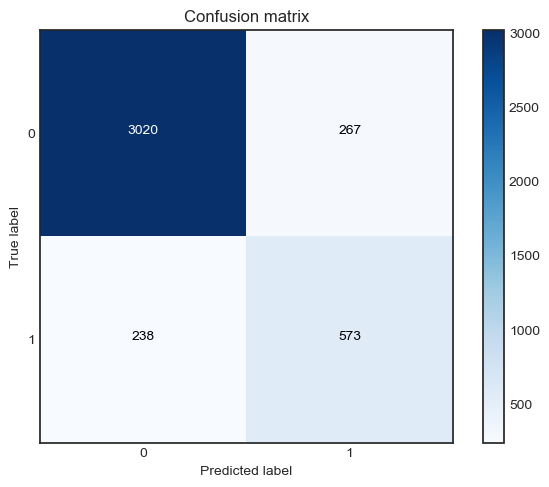

In [87]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_dtc , classes=class_names, title='Confusion matrix')
plt.show()

In [88]:
Accuracy_Test=(confusion_matrix_test_dtc[0,0]+confusion_matrix_test_dtc[1,1])/(confusion_matrix_test_dtc[0,0]+confusion_matrix_test_dtc[0,1]+confusion_matrix_test_dtc[1,0]+confusion_matrix_test_dtc[1,1])
TNR_Test_dtc= confusion_matrix_test_dtc[0,0]/(confusion_matrix_test_dtc[0,0] +confusion_matrix_test_dtc[0,1])
TPR_Test_dtc= confusion_matrix_test_dtc[1,1]/(confusion_matrix_test_dtc[1,0] +confusion_matrix_test_dtc[1,1])

print("Test TNR: ",TNR_Test_dtc)
print("Test TPR: ",TPR_Test_dtc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9187709157286279
Test TPR:  0.7065351418002466
Test Accuracy:  0.8767691556857004


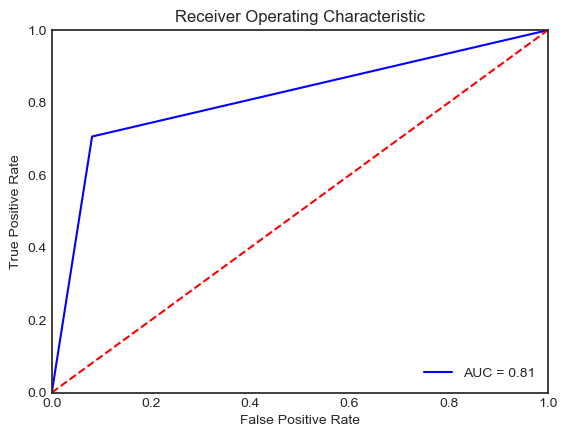

In [89]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_dtc)
roc_auc_dtc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_dtc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [90]:
print("Train Accuracy: ", acc_train_dtc)
print("Test Accuracy: ", acc_test_dtc)
print("Train Auc: ", roc_auc_dtc)
print("Test TNR: ",TNR_Test_dtc)
print("Test TPR: ",TPR_Test_dtc)

Train Accuracy:  1.0
Test Accuracy:  0.8767691556857004
Train Auc:  0.8126530287644372
Test TNR:  0.9187709157286279
Test TPR:  0.7065351418002466


In [91]:
#Building the RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40,random_state=0)
model_train_rfc= rfc.fit(X_train,y_train)
y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)


In [92]:
y_prob_test_rfc= rfc.predict_proba(X_test)[:,1]
acc_train_rfc = accuracy_score(y_true=y_train,y_pred=y_pred_train_rfc)
acc_test_rfc = accuracy_score(y_true=y_test,y_pred=y_pred_test_rfc)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_rfc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_rfc))

Train Decision Tree Accuracy: 0.9995118379301928
Test Decision Tree Accuracy: 0.9226451927769643


In [93]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_rfc = confusion_matrix(y_test, y_pred_test_rfc)
print("\n Confusion matrix \n", confusion_matrix_test_rfc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_rfc))





 Confusion matrix 
 [[3240   47]
 [ 270  541]]

 Classification report 
              precision    recall  f1-score   support

          0       0.92      0.99      0.95      3287
          1       0.92      0.67      0.77       811

avg / total       0.92      0.92      0.92      4098



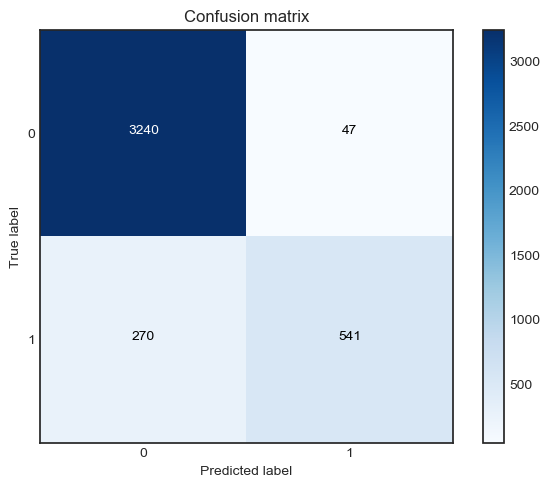

In [94]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_rfc , classes=class_names, title='Confusion matrix')
plt.show()

In [95]:
Accuracy_Test=(confusion_matrix_test_rfc[0,0]+confusion_matrix_test_rfc[1,1])/(confusion_matrix_test_rfc[0,0]+confusion_matrix_test_rfc[0,1]+confusion_matrix_test_rfc[1,0]+confusion_matrix_test_rfc[1,1])
TNR_Test_rfc= confusion_matrix_test_rfc[0,0]/(confusion_matrix_test_rfc[0,0] +confusion_matrix_test_rfc[0,1])
TPR_Test_rfc= confusion_matrix_test_rfc[1,1]/(confusion_matrix_test_rfc[1,0] +confusion_matrix_test_rfc[1,1])

print("Test TNR: ",TNR_Test_rfc)
print("Test TPR: ",TPR_Test_rfc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9857012473379981
Test TPR:  0.6670776818742293
Test Accuracy:  0.9226451927769643


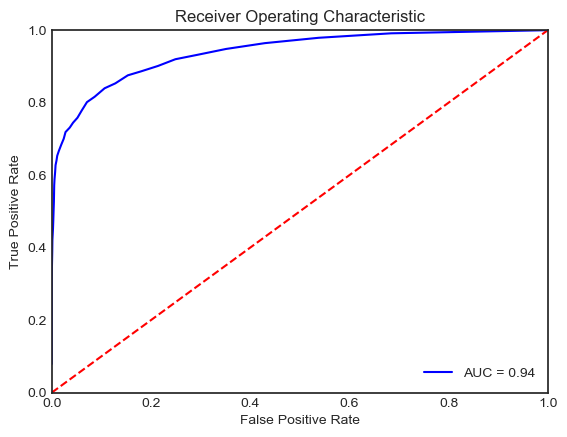

In [96]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_rfc)
roc_auc_rfc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_rfc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [97]:
print("Train Accuracy: ", acc_train_rfc)
print("Test Accuracy: ", acc_test_rfc)
print("Train Auc: ", roc_auc_rfc)
print("Test TNR: ",TNR_Test_rfc)
print("Test TPR: ",TPR_Test_rfc)

Train Accuracy:  0.9995118379301928
Test Accuracy:  0.9226451927769643
Train Auc:  0.9393971393491605
Test TNR:  0.9857012473379981
Test TPR:  0.6670776818742293


In [98]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
rfc_grid = RandomForestClassifier(n_jobs=-1)
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10],
    'max_features': [5,8,10,12,15],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100,200]
}
rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid)

In [100]:
## Fit the grid search model
rfc_cv_grid.fit(X = X_train, y = y_train)

KeyboardInterrupt: 

In [75]:
## Print best score and parameters
print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)
best_grid = rfc_cv_grid.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [464]:
res = pd.DataFrame([y_pred_test_lr,y_pred_test_svc,y_pred_test_dtc,y_pred_test_rfc]).T

In [465]:
res.columns = ['Logistic','SVC','DTC','RFC']
res

,Logistic,SVC,DTC,RFC
0,0,0,1,1
1,0,0,0,0
2,0,0,0,0
3,0,0,1,0
4,0,0,0,0
5,0,0,0,0
6,0,0,1,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [101]:
from scipy.stats import mode

In [102]:
stack = np.array([y_pred_test_lr,y_pred_test_svc,y_pred_test_dtc,y_pred_test_rfc]).T

In [103]:
stacked_pred = mode(stack,axis=1)[0]
stacked_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [104]:
print("Decistion Trees accuracy", accuracy_score(y_test,y_pred_test_dtc))
print("Logistic Regression accuracy", accuracy_score(y_test, y_pred_test_lr))
print("SVC accuracy", accuracy_score(y_test, y_pred_test_svc))
print("RFC Accuracy", accuracy_score(y_test, y_pred_test_rfc))
print("Stacked Accuracy: ", accuracy_score(y_test,stacked_pred))

Decistion Trees accuracy 0.8767691556857004
Logistic Regression accuracy 0.8006344558321132
SVC accuracy 0.8011224987798926
RFC Accuracy 0.9226451927769643
Stacked Accuracy:  0.8025866276232309


In [105]:
## Model Builsing using Boosing
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=1)
model_train_ada= ada.fit(X_train,y_train)
y_pred_train_ada = ada.predict(X_train)
y_pred_test_ada = ada.predict(X_test)

In [106]:
y_prob_test_ada= ada.predict_proba(X_test)[:,1]

acc_train_ada = accuracy_score(y_true=y_train,y_pred=y_pred_train_ada)
acc_test_ada = accuracy_score(y_true=y_test,y_pred=y_pred_test_ada)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_ada))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_ada))

Train Decision Tree Accuracy: 0.9489870637051501
Test Decision Tree Accuracy: 0.9226451927769643


In [107]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_ada= confusion_matrix(y_test, y_pred_test_ada)
print("\n Confusion matrix \n", confusion_matrix_test_ada)
print("\n Classification report \n", classification_report(y_test,y_pred_test_ada))



 Confusion matrix 
 [[3183  104]
 [ 213  598]]

 Classification report 
              precision    recall  f1-score   support

          0       0.94      0.97      0.95      3287
          1       0.85      0.74      0.79       811

avg / total       0.92      0.92      0.92      4098



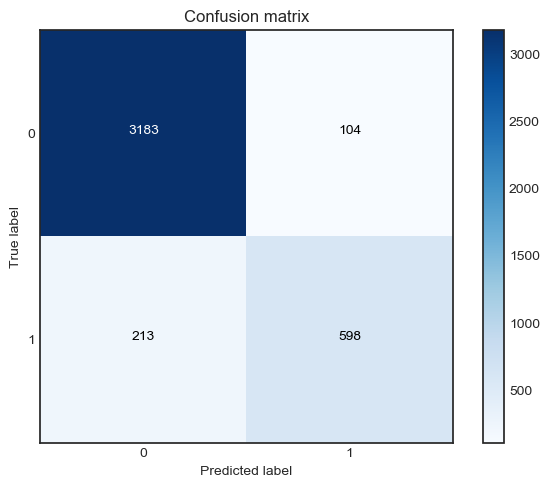

In [108]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_ada , classes=class_names, title='Confusion matrix')
plt.show()

In [109]:
Accuracy_Test=(confusion_matrix_test_ada[0,0]+confusion_matrix_test_ada[1,1])/(confusion_matrix_test_ada[0,0]+confusion_matrix_test_ada[0,1]+confusion_matrix_test_ada[1,0]+confusion_matrix_test_ada[1,1])
TNR_Test_ada= confusion_matrix_test_ada[0,0]/(confusion_matrix_test_ada[0,0] +confusion_matrix_test_ada[0,1])
TPR_Test_ada= confusion_matrix_test_ada[1,1]/(confusion_matrix_test_ada[1,0] +confusion_matrix_test_ada[1,1])

print("Test TNR: ",TNR_Test_ada)
print("Test TPR: ",TPR_Test_ada)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9683602068755705
Test TPR:  0.7373612823674476
Test Accuracy:  0.9226451927769643


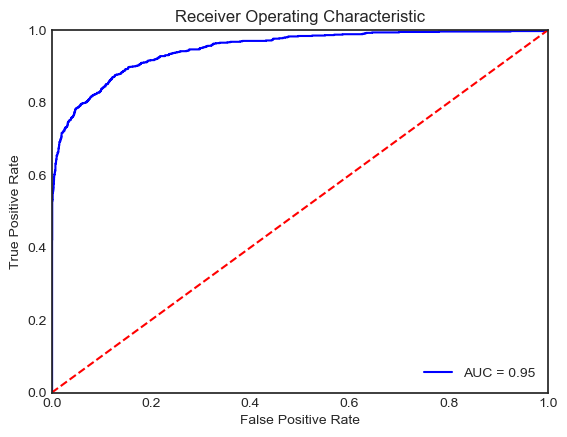

In [110]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_ada)
roc_auc_ada = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [111]:
print("Train Accuracy: ", acc_train_ada)
print("Test Accuracy: ", acc_test_ada)
print("Train Auc: ", roc_auc_ada)
print("Test TNR: ",TNR_Test_ada)
print("Test TPR: ",TPR_Test_ada)

Train Accuracy:  0.9489870637051501
Test Accuracy:  0.9226451927769643
Train Auc:  0.9482139594869299
Test TNR:  0.9683602068755705
Test TPR:  0.7373612823674476


In [537]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [100, 150, 200],
              'learning_rate' : [0.1, 0.5, 0.9]}

Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1)

In [538]:
%time Adaboost_model_clf.fit(X_train, y_train)
#Wall time: 53min 47s
#GridSearchCV(cv=None, error_score='raise',
#      estimator=AdaBoostClassifier(algorithm='SAMME.R',
#         base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
#            max_features=None, max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
#            splitter='best'),
#          learning_rate=1.0, n_estimators=50, random_state=None),
#       fit_params=None, iid=True, n_jobs=-1,
#       param_grid={'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.5, 0.9]},
#       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#      scoring=None, verbose=0)

Wall time: 7min 28s


GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [112]:
# Find best model
final_ada_model = Adaboost_model_clf.best_estimator_
print (Adaboost_model_clf.best_score_, Adaboost_model_clf.best_params_)

NameError: name 'Adaboost_model_clf' is not defined

In [113]:
# Build ada model using above Hyper parameters
## Model Builsing using Boosing
from sklearn.ensemble import AdaBoostClassifier
ada_final = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=200,
    learning_rate=0.5)
model_train_ada_final= ada_final.fit(X_train,y_train)
y_pred_train_ada_final = ada_final.predict(X_train)
y_pred_test_ada_final = ada_final.predict(X_test)

In [114]:
y_prob_test_ada_final= ada_final.predict_proba(X_test)[:,1]
acc_train_ada_final = accuracy_score(y_true=y_train,y_pred=y_pred_train_ada_final)
acc_test_ada_final = accuracy_score(y_true=y_test,y_pred=y_pred_test_ada_final)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_ada_final))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_ada_final))

Train Decision Tree Accuracy: 0.9618013180375885
Test Decision Tree Accuracy: 0.929477794045876


In [115]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_ada_final= confusion_matrix(y_test, y_pred_test_ada_final)
print("\n Confusion matrix \n", confusion_matrix_test_ada_final)
print("\n Classification report \n", classification_report(y_test,y_pred_test_ada_final))


 Confusion matrix 
 [[3201   86]
 [ 203  608]]

 Classification report 
              precision    recall  f1-score   support

          0       0.94      0.97      0.96      3287
          1       0.88      0.75      0.81       811

avg / total       0.93      0.93      0.93      4098



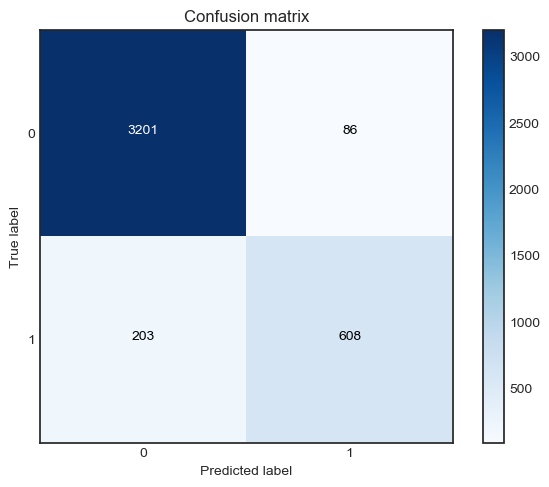

In [116]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_ada_final , classes=class_names, title='Confusion matrix')
plt.show()

In [117]:
Accuracy_Test=(confusion_matrix_test_ada_final[0,0]+confusion_matrix_test_ada_final[1,1])/(confusion_matrix_test_ada_final[0,0]+confusion_matrix_test_ada_final[0,1]+confusion_matrix_test_ada_final[1,0]+confusion_matrix_test_ada_final[1,1])
TNR_Test_ada_final= confusion_matrix_test_ada_final[0,0]/(confusion_matrix_test_ada_final[0,0] +confusion_matrix_test_ada_final[0,1])
TPR_Test_ada_final= confusion_matrix_test_ada_final[1,1]/(confusion_matrix_test_ada_final[1,0] +confusion_matrix_test_ada_final[1,1])

print("Test TNR: ",TNR_Test_ada_final)
print("Test TPR: ",TPR_Test_ada_final)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9738363249163371
Test TPR:  0.749691738594328
Test Accuracy:  0.929477794045876


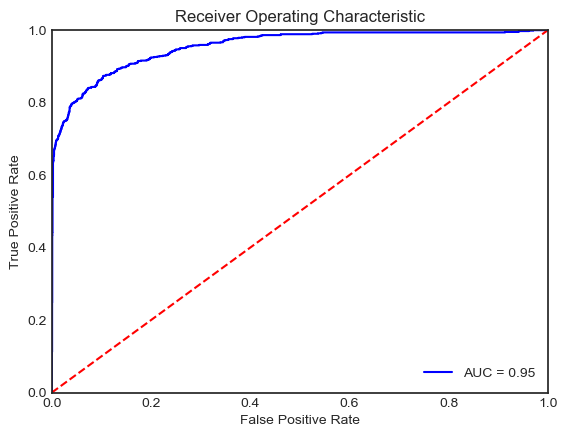

In [118]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_ada_final)
roc_auc_ada_final = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada_final)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [119]:
print("Train Accuracy: ", acc_train_ada_final)
print("Train Accuracy: ", acc_train_ada_final)
print("Train Auc: ", roc_auc_ada_final)
print("Test TNR: ",TNR_Test_ada_final)
print("Test TPR: ",TPR_Test_ada_final)

Train Accuracy:  0.9618013180375885
Train Accuracy:  0.9618013180375885
Train Auc:  0.9549805177291104
Test TNR:  0.9738363249163371
Test TPR:  0.749691738594328


In [120]:
## Model Building uisng Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbm =  GradientBoostingClassifier(n_estimators=150,
                                        learning_rate=0.1,
                                        subsample=0.8)
model_train_gbm= gbm.fit(X_train,y_train)
y_pred_train_gbm = gbm.predict(X_train)
y_pred_test_gbm = gbm.predict(X_test)

In [121]:
y_prob_test_gbm= gbm.predict_proba(X_test)[:,1]
acc_train_gbm = accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm)
acc_test_gbm = accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm))

Train Decision Tree Accuracy: 0.940749328777154
Test Decision Tree Accuracy: 0.9258174719375305


In [122]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_gbm= confusion_matrix(y_test, y_pred_test_gbm)
print("\n Confusion matrix \n", confusion_matrix_test_gbm)
print("\n Classification report \n", classification_report(y_test,y_pred_test_gbm))


 Confusion matrix 
 [[3217   70]
 [ 234  577]]

 Classification report 
              precision    recall  f1-score   support

          0       0.93      0.98      0.95      3287
          1       0.89      0.71      0.79       811

avg / total       0.92      0.93      0.92      4098



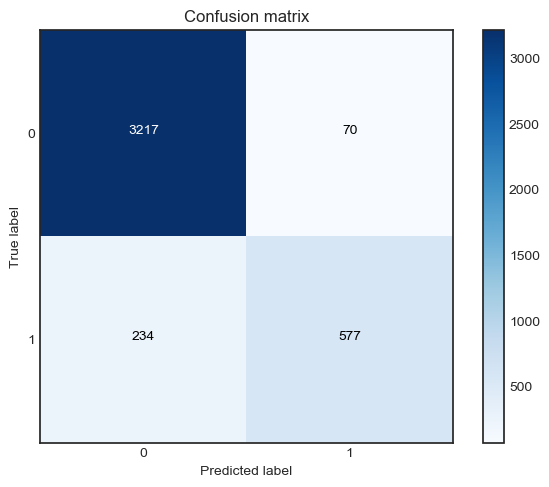

In [123]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_gbm , classes=class_names, title='Confusion matrix')
plt.show()

In [124]:
Accuracy_Test=(confusion_matrix_test_gbm[0,0]+confusion_matrix_test_gbm[1,1])/(confusion_matrix_test_gbm[0,0]+confusion_matrix_test_gbm[0,1]+confusion_matrix_test_gbm[1,0]+confusion_matrix_test_gbm[1,1])
TNR_Test_gbm= confusion_matrix_test_gbm[0,0]/(confusion_matrix_test_gbm[0,0] +confusion_matrix_test_gbm[0,1])
TPR_Test_gbm= confusion_matrix_test_gbm[1,1]/(confusion_matrix_test_gbm[1,0] +confusion_matrix_test_gbm[1,1])

print("Test TNR: ",TNR_Test_gbm)
print("Test TPR: ",TPR_Test_gbm)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9787039853970185
Test TPR:  0.7114673242909988
Test Accuracy:  0.9258174719375305


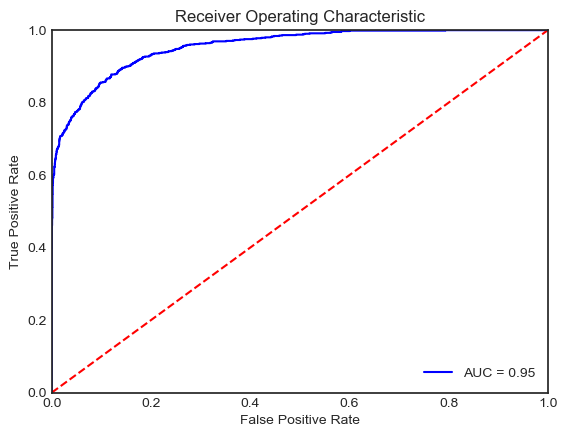

In [125]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_gbm)
roc_auc_gbm = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_gbm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [126]:
print("Train Accuracy: ", acc_train_gbm)
print("Test Accuracy: ", acc_test_gbm)
print("Train Auc: ", roc_auc_gbm)
print("Test TNR: ",TNR_Test_gbm)
print("Test TPR: ",TPR_Test_gbm)

Train Accuracy:  0.940749328777154
Test Accuracy:  0.9258174719375305
Train Auc:  0.95483796910221
Test TNR:  0.9787039853970185
Test TPR:  0.7114673242909988


In [547]:
#Grid Search Cross validation
from sklearn.model_selection import GridSearchCV

# Model in use
GBM_Grid = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150,200,250],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.5,0.9]}
 
GBM_CV = GridSearchCV(estimator=GBM_Grid, param_grid=param_grid)

In [548]:
%time GBM_CV.fit(X_train, y_train)

Wall time: 51min 30s


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200, 250], 'max_depth': [5, 10], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [127]:
# Find best model
final_gbm_model = GBM_CV.best_estimator_
print (GBM_CV.best_score_, GBM_CV.best_params_)

NameError: name 'GBM_CV' is not defined

In [128]:
## Model Building uisng Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbm_final =  GradientBoostingClassifier(n_estimators=250,
                                        learning_rate=0.5,
                                        subsample=0.8,
                                        max_depth=5)
model_train_gbm_final= gbm_final.fit(X_train,y_train)
y_pred_train_gbm_final = gbm_final.predict(X_train)
y_pred_test_gbm_final = gbm_final.predict(X_test)

In [129]:
y_prob_test_gbm_final = gbm_final.predict_proba(X_test)[:,1]
acc_train_gbm_final = accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm_final)
acc_test_gbm_final = accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm_final)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm_final))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm_final))

Train Decision Tree Accuracy: 0.9999389797412741
Test Decision Tree Accuracy: 0.9238653001464129


In [130]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_gbm_final= confusion_matrix(y_test, y_pred_test_gbm_final)
print("\n Confusion matrix \n", confusion_matrix_test_gbm_final)
print("\n Classification report \n", classification_report(y_test,y_pred_test_gbm_final))


 Confusion matrix 
 [[3183  104]
 [ 208  603]]

 Classification report 
              precision    recall  f1-score   support

          0       0.94      0.97      0.95      3287
          1       0.85      0.74      0.79       811

avg / total       0.92      0.92      0.92      4098



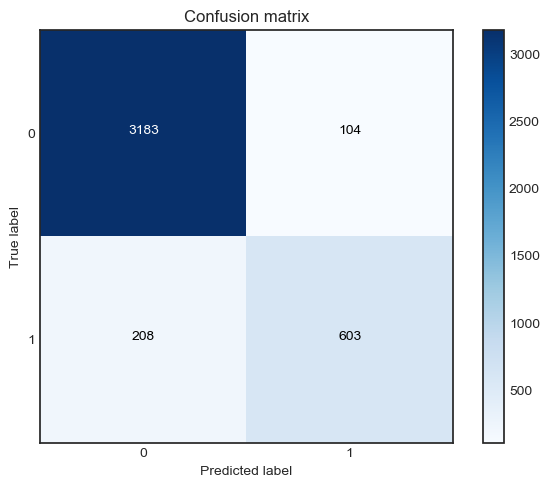

In [131]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_gbm_final , classes=class_names, title='Confusion matrix')
plt.show()

In [132]:
Accuracy_Test=(confusion_matrix_test_gbm_final[0,0]+confusion_matrix_test_gbm_final[1,1])/(confusion_matrix_test_gbm_final[0,0]+confusion_matrix_test_gbm[0,1]+confusion_matrix_test_gbm[1,0]+confusion_matrix_test_gbm_final[1,1])
TNR_Test_gbm_final= confusion_matrix_test_gbm_final[0,0]/(confusion_matrix_test_gbm_final[0,0] +confusion_matrix_test_gbm_final[0,1])
TPR_Test_gbm_final= confusion_matrix_test_gbm_final[1,1]/(confusion_matrix_test_gbm_final[1,0] +confusion_matrix_test_gbm_final[1,1])

print("Test TNR: ",TNR_Test_gbm_final)
print("Test TPR: ",TPR_Test_gbm_final)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9683602068755705
Test TPR:  0.7435265104808878
Test Accuracy:  0.9256723716381418


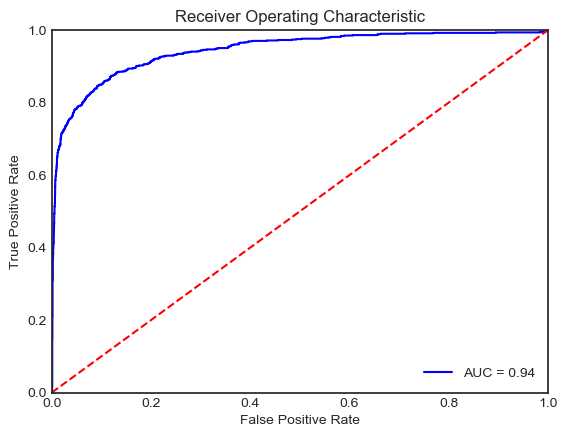

In [133]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_gbm_final)
roc_auc_gbm_final = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_gbm_final)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [134]:
print("Train Accuracy: ", acc_train_gbm_final)
print("Test Accuracy: ", acc_test_gbm_final)
print("Train Auc: ", roc_auc_gbm_final)
print("Test TNR: ",TNR_Test_gbm_final)
print("Test TPR: ",TPR_Test_gbm_final)

Train Accuracy:  0.9999389797412741
Test Accuracy:  0.9238653001464129
Train Auc:  0.9438140835792608
Test TNR:  0.9683602068755705
Test TPR:  0.7435265104808878


In [135]:
# Build Model XGBOOST
from xgboost import XGBClassifier
xgb = XGBClassifier()
model_train_xgb= xgb.fit(X_train,y_train)
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [136]:
y_prob_test_xgb= xgb.predict_proba(X_test)[:,1]
acc_train_xgb = accuracy_score(y_true=y_train,y_pred=y_pred_train_xgb)
acc_test_xgb = accuracy_score(y_true=y_test,y_pred=y_pred_test_xgb)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_xgb))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_xgb))

Train Decision Tree Accuracy: 0.9315352697095436
Test Decision Tree Accuracy: 0.9228892142508541


In [137]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_xgb= confusion_matrix(y_test, y_pred_test_xgb)
cr = classification_report(y_test,y_pred_test_xgb)
print("\n Confusion matrix \n", confusion_matrix_test_xgb)
print("\n Classification report \n", classification_report(y_test,y_pred_test_xgb))


 Confusion matrix 
 [[3217   70]
 [ 246  565]]

 Classification report 
              precision    recall  f1-score   support

          0       0.93      0.98      0.95      3287
          1       0.89      0.70      0.78       811

avg / total       0.92      0.92      0.92      4098



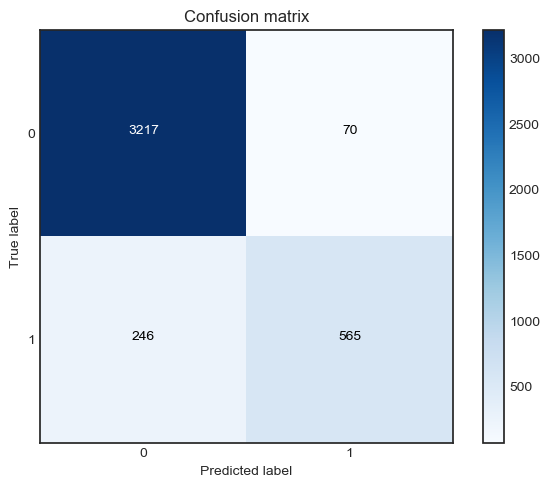

In [138]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_xgb , classes=class_names, title='Confusion matrix')
plt.show()

In [139]:
Accuracy_Test=(confusion_matrix_test_xgb[0,0]+confusion_matrix_test_xgb[1,1])/(confusion_matrix_test_xgb[0,0]+confusion_matrix_test_gbm[0,1]+confusion_matrix_test_xgb[1,0]+confusion_matrix_test_xgb[1,1])
TNR_Test_xgb= confusion_matrix_test_gbm[0,0]/(confusion_matrix_test_xgb[0,0] +confusion_matrix_test_xgb[0,1])
TPR_Test_xgb= confusion_matrix_test_gbm[1,1]/(confusion_matrix_test_xgb[1,0] +confusion_matrix_test_xgb[1,1])

print("Test TNR: ",TNR_Test_xgb)
print("Test TPR: ",TPR_Test_xgb)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9787039853970185
Test TPR:  0.7114673242909988
Test Accuracy:  0.9228892142508541


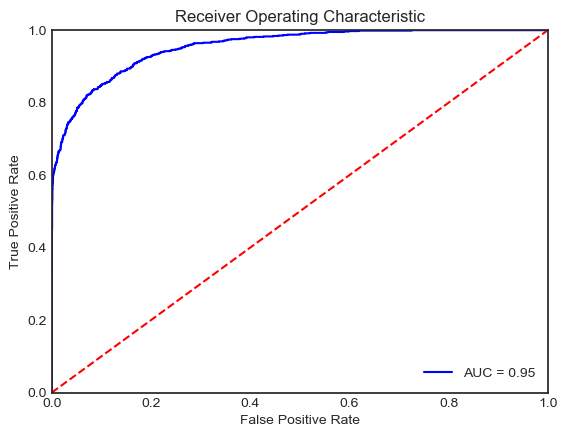

In [140]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_xgb)
roc_auc_xgb = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_xgb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [141]:
print("Train Accuracy: ", acc_train_xgb)
print("Test Accuracy: ", acc_test_xgb)
print("Train Auc: ", roc_auc_xgb)
print("Test TNR: ",TNR_Test_xgb)
print("Test TPR: ",TPR_Test_xgb)

Train Accuracy:  0.9315352697095436
Test Accuracy:  0.9228892142508541
Train Auc:  0.9544328308994405
Test TNR:  0.9787039853970185
Test TPR:  0.7114673242909988


In [142]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Model in use
xgb_Grid = xgb.XGBClassifier()
 
# Use a grid over parameters of interest
param_grid = { 
           "nthread":[4,5], 
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.05,0.2],
           "n_estimators": [3,5],
           "objective":["binary:logistic"]}
 
xgb_clf = GridSearchCV(estimator=xgb_Grid, param_grid=param_grid)

In [ ]:
%time xgb_clf.fit(X_train, y_train)

In [ ]:
# Find best model
final_gbm_model = xgb_clf.best_estimator_
print (xgb_clf.best_score_, xgb_clf.best_params_)

In [143]:
# Build bagging Model 
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model_train_bag= bag.fit(X_train,y_train)
y_pred_train_bag = bag.predict(X_train)
y_pred_test_bag = bag.predict(X_test)

In [144]:
y_prob_test_bag= bag.predict_proba(X_test)[:,1]

acc_train_bag = accuracy_score(y_true=y_train,y_pred=y_pred_train_bag)
acc_test_bag = accuracy_score(y_true=y_test,y_pred=y_pred_test_bag)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_bag))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_bag))

Train Decision Tree Accuracy: 0.20460092750793263
Test Decision Tree Accuracy: 0.19790141532454855


In [145]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_bag= confusion_matrix(y_test, y_pred_test_bag)
print("\n Confusion matrix \n", confusion_matrix_test_bag)
print("\n Classification report \n", classification_report(y_test,y_pred_test_bag))


 Confusion matrix 
 [[   0 3287]
 [   0  811]]

 Classification report 
              precision    recall  f1-score   support

          0       0.00      0.00      0.00      3287
          1       0.20      1.00      0.33       811

avg / total       0.04      0.20      0.07      4098



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


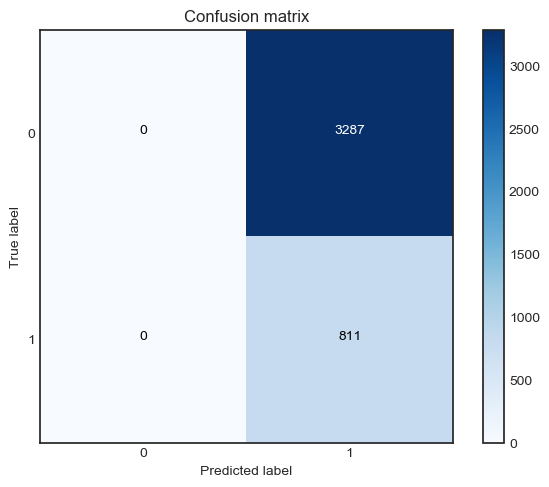

In [146]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_bag , classes=class_names, title='Confusion matrix')
plt.show()

In [147]:
Accuracy_Test=(confusion_matrix_test_bag[0,0]+confusion_matrix_test_bag[1,1])/(confusion_matrix_test_bag[0,0]+confusion_matrix_test_bag[0,1]+confusion_matrix_test_bag[1,0]+confusion_matrix_test_bag[1,1])
TNR_Test_bag= confusion_matrix_test_bag[0,0]/(confusion_matrix_test_bag[0,0] +confusion_matrix_test_bag[0,1])
TPR_Test_bag= confusion_matrix_test_bag[1,1]/(confusion_matrix_test_bag[1,0] +confusion_matrix_test_bag[1,1])

print("Test TNR: ",TNR_Test_bag)
print("Test TPR: ",TPR_Test_bag)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.0
Test TPR:  1.0
Test Accuracy:  0.19790141532454855


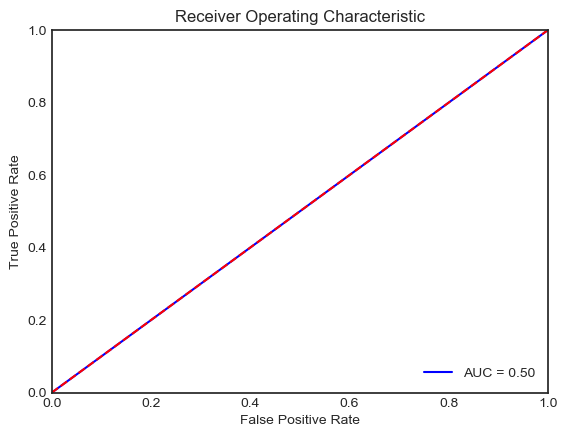

In [148]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_bag)
roc_auc_bag = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_bag)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [149]:
print("Train Accuracy: ", acc_train_bag)
print("Test Accuracy: ", acc_test_bag)
print("Train Auc: ", roc_auc_bag)
print("Test TNR: ",TNR_Test_bag)
print("Test TPR: ",TPR_Test_bag)

Train Accuracy:  0.20460092750793263
Test Accuracy:  0.19790141532454855
Train Auc:  0.5
Test TNR:  0.0
Test TPR:  1.0


In [150]:
# Build Balanced bagging classifier model
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn import tree
bbc = BalancedBaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model_train_bbc= bbc.fit(X_train,y_train)
y_pred_train_bbc = bbc.predict(X_train)
y_pred_test_bbc = bbc.predict(X_test)

In [151]:
y_prob_test_bbc= bbc.predict_proba(X_test)[:,1]

acc_train_bbc = accuracy_score(y_true=y_train,y_pred=y_pred_train_bbc)
acc_test_bbc = accuracy_score(y_true=y_test,y_pred=y_pred_test_bbc) 

print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_bbc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_bbc))

Train Decision Tree Accuracy: 0.943129118867464
Test Decision Tree Accuracy: 0.8801854563201562


In [152]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_bbc= confusion_matrix(y_test, y_pred_test_bbc)
print("\n Confusion matrix \n", confusion_matrix_test_bbc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_bbc))


 Confusion matrix 
 [[2940  347]
 [ 144  667]]

 Classification report 
              precision    recall  f1-score   support

          0       0.95      0.89      0.92      3287
          1       0.66      0.82      0.73       811

avg / total       0.89      0.88      0.88      4098



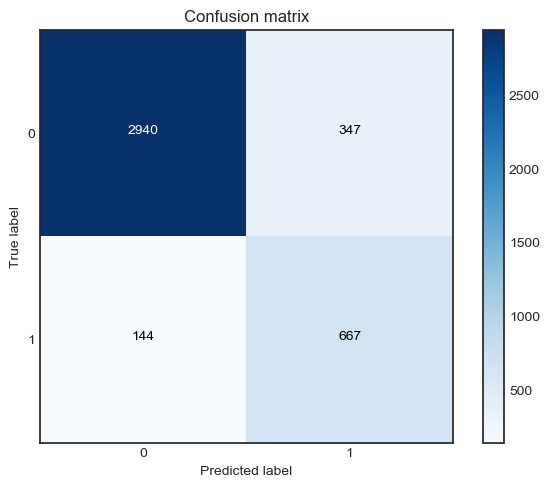

In [153]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_bbc , classes=class_names, title='Confusion matrix')
plt.show()

In [154]:
Accuracy_Test=(confusion_matrix_test_bbc[0,0]+confusion_matrix_test_bbc[1,1])/(confusion_matrix_test_bbc[0,0]+confusion_matrix_test_bbc[0,1]+confusion_matrix_test_bbc[1,0]+confusion_matrix_test_bbc[1,1])
TNR_Test_bbc= confusion_matrix_test_bbc[0,0]/(confusion_matrix_test_bbc[0,0] +confusion_matrix_test_bbc[0,1])
TPR_Test_bbc= confusion_matrix_test_bbc[1,1]/(confusion_matrix_test_bbc[1,0] +confusion_matrix_test_bbc[1,1])

print("Test TNR: ",TNR_Test_bbc)
print("Test TPR: ",TPR_Test_bbc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.8944326133252206
Test TPR:  0.8224414303329223
Test Accuracy:  0.8801854563201562


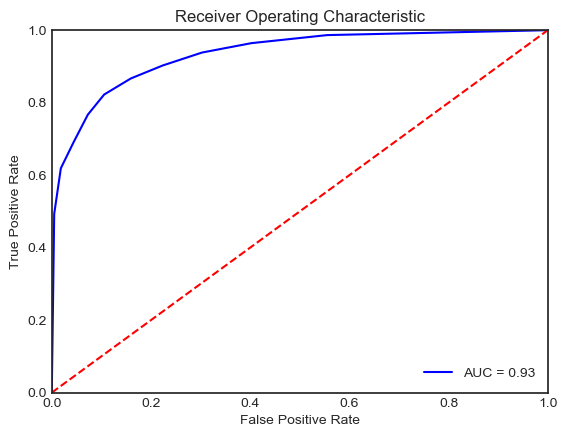

In [155]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_bbc)
roc_auc_bbc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_bbc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [156]:
print("Train Accuracy: ", acc_train_bbc)
print("Test Accuracy: ", acc_test_bbc)
print("Train Auc: ", roc_auc_bbc)
print("Test TNR: ",TNR_Test_bbc)
print("Test TPR: ",TPR_Test_bbc)

Train Accuracy:  0.943129118867464
Test Accuracy:  0.8801854563201562
Train Auc:  0.9332720499280316
Test TNR:  0.8944326133252206
Test TPR:  0.8224414303329223


In [157]:
## Aplying SMOTE
# Find the Target value distribution
train_labels.value_counts()

0    16322
1     4164
Name: target, dtype: int64

In [158]:

train_labels.head(6)
train_labels.shape
train_labels.columns = ['target']

In [159]:
train_labels.head(6)

0    0
1    0
2    0
3    0
4    0
5    0
Name: target, dtype: int64

In [160]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='target',data = train_labels)

ValueError: Could not interpret input 'target'

<Figure size 1000x600 with 0 Axes>

In [161]:
# Data Imputation
# Impute missing values with mean Imputation
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(strategy="mean")
bank_data_mean_imputed1 = bank_data.copy()
bank_data_mean_imputed1.iloc[:,0:42] = mean_imputer.fit_transform(bank_data_mean_imputed.iloc[:,0:42])

In [162]:
bank_data_mean_imputed1.head()
bank_data_mean_imputed1.isnull().sum()

Attr1     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr12    0
Attr13    0
Attr15    0
Attr16    0
Attr19    0
Attr20    0
Attr21    0
Attr22    0
Attr24    0
Attr25    0
Attr27    0
Attr28    0
Attr29    0
Attr32    0
Attr33    0
Attr34    0
Attr35    0
Attr36    0
Attr37    0
Attr39    0
Attr40    0
Attr41    0
Attr42    0
Attr45    0
Attr47    0
Attr52    0
Attr53    0
Attr55    0
Attr57    0
Attr59    0
Attr60    0
Attr61    0
Attr62    0
Attr64    0
dtype: int64

In [163]:
# Split the Train and Test Data
from sklearn.model_selection import train_test_split
# Split the data into X and y
X = bank_data_mean_imputed1
y = train_labels

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (20486, 41)
Shape of y: (20486,)


In [164]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=1)

print("Number transactions X_train dataset: ", X_train1.shape)
print("Number transactions y_train dataset: ", y_train1.shape)
print("Number transactions X_test dataset: ", X_test1.shape)
print("Number transactions y_test dataset: ", y_test1.shape)

Number transactions X_train dataset:  (16388, 41)
Number transactions y_train dataset:  (16388,)
Number transactions X_test dataset:  (4098, 41)
Number transactions y_test dataset:  (4098,)


In [165]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train1==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train1==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train1, y_train1)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3353
Before OverSampling, counts of label '0': 13035 

After OverSampling, the shape of train_X: (26070, 41)
After OverSampling, the shape of train_y: (26070,) 

After OverSampling, counts of label '1': 13035
After OverSampling, counts of label '0': 13035


In [166]:
## Model Builsing using Boosing
from sklearn.ensemble import AdaBoostClassifier
ada_smote = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=1)
model_train_ada= ada_smote.fit(X_train_res,y_train_res)
y_pred_train_ada_smote = ada_smote.predict(X_train_res)
y_pred_test_ada_smote = ada_smote.predict(X_test1)

In [167]:
y_prob_test_ada_smote= ada_smote.predict_proba(X_test1)[:,1]

acc_train_ada_smote = accuracy_score(y_true=y_train_res,y_pred=y_pred_train_ada_smote)
acc_test_ada_smote = accuracy_score(y_true=y_test1,y_pred=y_pred_test_ada_smote)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train_res,y_pred=y_pred_train_ada_smote))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test1,y_pred=y_pred_test_ada_smote))

Train Decision Tree Accuracy: 0.9448408131952436
Test Decision Tree Accuracy: 0.9023914104441191


In [168]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_ada_smote= confusion_matrix(y_test, y_pred_test_ada_smote)
print("\n Confusion matrix \n", confusion_matrix_test_ada_smote)
print("\n Classification report \n", classification_report(y_test,y_pred_test_ada_smote))



 Confusion matrix 
 [[3058  229]
 [ 171  640]]

 Classification report 
              precision    recall  f1-score   support

          0       0.95      0.93      0.94      3287
          1       0.74      0.79      0.76       811

avg / total       0.91      0.90      0.90      4098



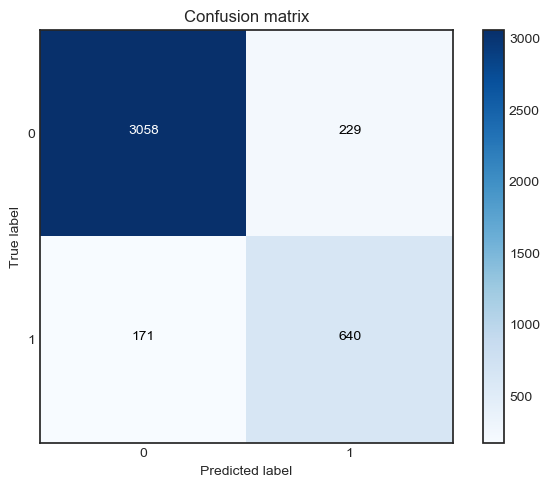

In [169]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_ada_smote , classes=class_names, title='Confusion matrix')
plt.show()

In [170]:
Accuracy_Test=(confusion_matrix_test_ada_smote[0,0]+confusion_matrix_test_ada_smote[1,1])/(confusion_matrix_test_ada_smote[0,0]+confusion_matrix_test_ada_smote[0,1]+confusion_matrix_test_ada_smote[1,0]+confusion_matrix_test_ada_smote[1,1])
TNR_Test_ada_smote= confusion_matrix_test_ada_smote[0,0]/(confusion_matrix_test_ada_smote[0,0] +confusion_matrix_test_ada_smote[0,1])
TPR_Test_ada_smote= confusion_matrix_test_ada_smote[1,1]/(confusion_matrix_test_ada_smote[1,0] +confusion_matrix_test_ada_smote[1,1])

print("Test TNR: ",TNR_Test_ada_smote)
print("Test TPR: ",TPR_Test_ada_smote)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9303316093702464
Test TPR:  0.7891491985203453
Test Accuracy:  0.9023914104441191


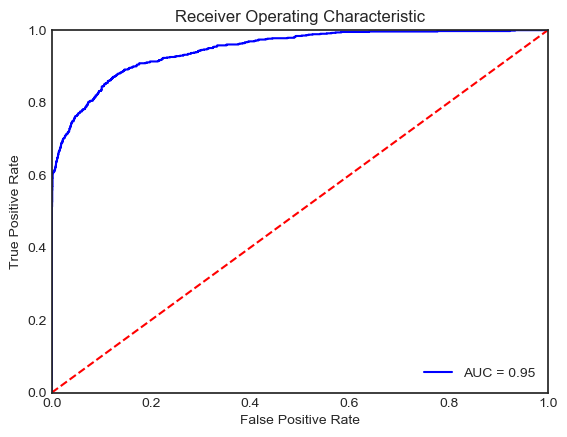

In [171]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_ada_smote)
roc_auc_ada_smote = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada_smote)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [172]:
print("Train Accuracy: ", acc_train_ada_smote)
print("Test Accuracy: ", acc_test_ada_smote)
print("Train Auc: ", roc_auc_ada_smote)
print("Test TNR: ",TNR_Test_ada_smote)
print("Test TPR: ",TPR_Test_ada_smote)

Train Accuracy:  0.9448408131952436
Test Accuracy:  0.9023914104441191
Train Auc:  0.9470758212395203
Test TNR:  0.9303316093702464
Test TPR:  0.7891491985203453


In [176]:
from prettytable import PrettyTable
t = PrettyTable(['Name','Train_accuracy', 'Test_accuracy', 'Roc_Auc', 'Test TNR', 'Test TPR'])
t.add_row(["Logistic Regression",acc_train_lr,acc_test_lr,roc_auc_lr,TNR_Test_lr,TPR_Test_lr])
t.add_row(["SVC",acc_train_svc,acc_test_svc,roc_auc_svc,TNR_Test_svc,TPR_Test_svc])
t.add_row(["DTC",acc_train_dtc,acc_test_dtc,roc_auc_dtc,TNR_Test_dtc,TPR_Test_dtc])
t.add_row(["RFC",acc_train_rfc,acc_test_rfc,roc_auc_rfc,TNR_Test_rfc,TPR_Test_rfc])
t.add_row(["ADABOOST_BASIC",acc_train_ada,acc_test_ada,roc_auc_ada,TNR_Test_ada,TPR_Test_ada])
t.add_row(["ADABOOST FINAL",acc_train_ada_final,acc_test_ada_final,roc_auc_ada_final,TNR_Test_ada_final,TPR_Test_ada_final])
t.add_row(["GBC BASIC",acc_train_gbm,acc_test_gbm,roc_auc_gbm,TNR_Test_gbm,TPR_Test_gbm])
t.add_row(["GBC FINAL",acc_train_gbm_final,acc_test_gbm_final,roc_auc_gbm_final,TNR_Test_gbm_final,TPR_Test_gbm_final])
t.add_row(["XGBOOST BASIC",acc_train_xgb,acc_test_xgb,roc_auc_xgb,TNR_Test_xgb,TPR_Test_xgb])
#t.add_row(["XGBOOST FINAL",acc_train_xgb_final,acc_test_xgb_final,roc_auc_xgb_final,TNR_Test_xgb_final,TPR_Test_xgb_final])
t.add_row(["BAGGING",acc_train_bag,acc_test_bag,roc_auc_bag,TNR_Test_bag,TPR_Test_bag])
t.add_row(["BALANCED BAGGING",acc_train_bbc,acc_test_bbc,roc_auc_bbc,TNR_Test_bbc,TPR_Test_bbc])
t.add_row(["SMOTE ADABOOST",acc_train_ada_smote,acc_test_ada_smote,roc_auc_ada_smote,TNR_Test_ada_smote,TPR_Test_ada_smote])
 
print(t.get_string(title="Results")) 

+---------------------+---------------------+---------------------+--------------------+--------------------+-----------------------+
|         Name        |    Train_accuracy   |    Test_accuracy    |      Roc_Auc       |      Test TNR      |        Test TPR       |
+---------------------+---------------------+---------------------+--------------------+--------------------+-----------------------+
| Logistic Regression |  0.7960702953380522 |  0.8006344558321132 | 0.7182635176424559 | 0.9920900517188926 |  0.02466091245376079  |
|         SVC         |  0.7975958018061997 |  0.8011224987798926 | 0.7994151379889465 | 0.998478856099787  | 0.0012330456226880395 |
|         DTC         |         1.0         |  0.8767691556857004 | 0.8126530287644372 | 0.9187709157286279 |   0.7065351418002466  |
|         RFC         |  0.9995118379301928 |  0.9226451927769643 | 0.9393971393491605 | 0.9857012473379981 |   0.6670776818742293  |
|    ADABOOST_BASIC   |  0.9489870637051501 |  0.9226451927769

In [174]:
print("\n Classification report Logistic Classification \n", classification_report(y_test,y_pred_test_lr))
print("\n Classification report  SVC \n", classification_report(y_test,y_pred_test_svc))
print("\n Classification report DTC \n", classification_report(y_test,y_pred_test_dtc))
print("\n Classification report RFC \n", classification_report(y_test,y_pred_test_rfc))
print("\n Classification report ADABOOST BASIC\n", classification_report(y_test,y_pred_test_ada))
print("\n Classification report ADABOOST FINAL \n", classification_report(y_test,y_pred_test_ada_final))
print("\n Classification report GBM BASIC \n", classification_report(y_test,y_pred_test_gbm))
print("\n Classification report GBM FINAL \n", classification_report(y_test,y_pred_test_gbm_final))
print("\n Classification report XGBOOST BASIC \n", classification_report(y_test,y_pred_test_xgb))
#print("\n Classification report XGBOOST FINAL \n", classification_report(y_test,y_pred_test_xgb_final))
print("\n Classification report BAGGING \n", classification_report(y_test,y_pred_test_bag))
print("\n Classification report BALANCED BAGING \n", classification_report(y_test,y_pred_test_bbc))
print("\n Classification report ADAMOOST & SMOTE \n", classification_report(y_test,y_pred_test_ada_smote))


 Classification report Logistic Classification 
              precision    recall  f1-score   support

          0       0.80      0.99      0.89      3287
          1       0.43      0.02      0.05       811

avg / total       0.73      0.80      0.72      4098


 Classification report  SVC 
              precision    recall  f1-score   support

          0       0.80      1.00      0.89      3287
          1       0.17      0.00      0.00       811

avg / total       0.68      0.80      0.71      4098


 Classification report DTC 
              precision    recall  f1-score   support

          0       0.93      0.92      0.92      3287
          1       0.68      0.71      0.69       811

avg / total       0.88      0.88      0.88      4098


 Classification report RFC 
              precision    recall  f1-score   support

          0       0.92      0.99      0.95      3287
          1       0.92      0.67      0.77       811

avg / total       0.92      0.92      0.92      4098


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
